#Primer Examen Métodos Computacionales
###Johana Marcela Vega Jimenez
###1049654027


In [22]:
import pandas as pd
import requests
import numpy as np
import random
from scipy import optimize
import matplotlib.pyplot as plt


In [2]:
datos = pd.read_json('https://datahub.io/core/country-list/r/data.json')

A) Use el API de institutions para extraer la lista de instituciones del país

In [4]:
pais= np.random.choice(datos.Name)       #Se escoge un país aleatorio de la lista del dataframe anterior
df=pd.read_json(f'https://inspirehep.net/api/institutions?q={pais}') #se obtiene el archivo json con el pais seleccionado
df

#Nota: si el país no tiene articulos publicados en la pagina, aparece un mensaje de error, se debe ejecutar varias veces la celda hasta que aparezca un pais que si tenga articulos publicados

,hits,links
hits,[{'updated': '2021-06-26T06:08:38.713317+00:00...,NaN
total,10,NaN
self,NaN,https://inspirehep.net/api/institutions/?q=Cyp...
json,NaN,https://inspirehep.net/api/institutions/?q=Cyp...


In [5]:
#Se creó un ciclo for para evaluar el numero de papers de cada institución
for i in range(len(df.loc['hits','hits'])):
  df1 = df.loc['hits','hits'][i].get('metadata').get('number_of_papers')
  if df1 > 0:
    uni = df.loc['hits','hits'][i].get('metadata').get('legacy_ICN') #Se obtiene el nombre de la institución
    print(uni) 
    break

Cyprus Coll.


B) Con el API de literatura obtenga el JSON con los artículos de menos de 10 autores usando el "legacy_ICN"
C) Para al menos un artículo de esa institución, extraiga el URL del perfil de cada autor de esa institución que se encuentra dentro del campo "authors" en "record" y luego en "$ref".

In [9]:
import requests                                                                                                                                                      
n = []
nuevo = requests.get(f'https://inspirehep.net/api/literature?sort=mostrecent&page=1&q={uni}+and+ac+1-%3E+10') #se obtiene el archivo json con los datos de la institución obtenida en el punto anterior
for i in range(len(nuevo.json()['hits']['hits'][0].get('metadata').get('authors'))):       
  url = nuevo.json()['hits']['hits'][0].get('metadata').get('authors')[i]['record'].get('$ref') #url
  print(url)
  n.append(url)

https://inspirehep.net/api/authors/1912815
https://inspirehep.net/api/authors/1014627
https://inspirehep.net/api/authors/1873701
https://inspirehep.net/api/authors/1912816
https://inspirehep.net/api/authors/1912817
https://inspirehep.net/api/authors/1912818
https://inspirehep.net/api/authors/1041902
https://inspirehep.net/api/authors/993979
https://inspirehep.net/api/authors/1019820
https://inspirehep.net/api/authors/1066277


D) Con cada uno de los datos del resultado del API para cada perfil construya una tabla

In [10]:
nombre = []
for i in n:
  response = requests.get(i)                                                                              
  authors = response.json()['metadata']['name']['value']
  nombre.append(authors) #Se crea una lista con todos los nombres de las url

In [11]:
mail = [] 
for i in n:
  datost = requests.get(i)
  if "email_addresses" in datost.json()['metadata']:
    correo = datost.json()['metadata']['email_addresses'][0]['value']
  else:
    correo = 'NN'
  mail.append(correo) #Se crea una lista con todos los email de las url

In [12]:
inst = []
rank = []
inicio = []
fin = []
for i in n:
  datost = requests.get(i)
  if "positions" in datost.json()['metadata']:
    institucion = datost.json()['metadata']['positions'][0]['institution']
    ran = datost.json()['metadata']['positions'][0].get('rank')
    start = datost.json()['metadata']['positions'][0].get('start_date')
    end = datost.json()['metadata']['positions'][0].get('end_date')
  else:
    institucion = 'NN'
    ran = 'NN'
    start = 'NN'
    end = 'NN'

  inst.append(institucion)
  rank.append(ran)
  inicio.append(start)
  fin.append(end)

  #listas con los datos de posicion actual


In [13]:
tabla = pd.DataFrame({"nombre": nombre, "email": mail,"rango": rank,"institución": institucion,"fecha de inicio": inicio, "fecha de finalización": fin}) 
tabla #dataframe con los datos obtenidos anteriormente

,nombre,email,rango,institución,fecha de inicio,fecha de finalización
0,"Bushnaq, Lucius",NN,NN,"ETH, Zurich (main)",NN,NN
1,"Campos Plasencia, Isabel",isabel.campos@cern.ch,SENIOR,"ETH, Zurich (main)",2008,None
2,"Catillo, Marco",NN,NN,"ETH, Zurich (main)",NN,NN
3,"Cotellucci, Alessandro",alessandro.cotellucci@physik.hu-berlin.de,PHD,"ETH, Zurich (main)",2021,None
4,"Dale, Madeleine",NN,NN,"ETH, Zurich (main)",NN,NN
5,"Lücke, Jens",jens.luecke@hu-berlin.de,PHD,"ETH, Zurich (main)",2019,None
6,"Patella, Agostino",agostino.patella@physik.hu-berlin.de,SENIOR,"ETH, Zurich (main)",2018,None
7,"Peardon, Michael J.",mjp@maths.tcd.ie,SENIOR,"ETH, Zurich (main)",2000,None
8,"Tantalo, Nazario",nazario.tantalo@roma2.infn.it,STAFF,"ETH, Zurich (main)",None,None
9,"Krstic Marinkovic, Marina",marina.marinkovic@cern.ch,JUNIOR,"ETH, Zurich (main)",2021,None


2) 
A) Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación

In [14]:
raices = [random.uniform(2,7) for i in range(3)]
p = np.poly1d(raices,r = True)
print(p)


   3         2
1 x - 12.54 x + 51.48 x - 69.25


B) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

In [15]:
pp = p.deriv()
criticos = pp.roots
print(criticos)

[4.73698538 3.62259394]


C) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

In [18]:
optimize.fmin_powell(p,5)

Optimization terminated successfully.
         Current function value: -0.462475
         Iterations: 2
         Function evaluations: 34


array([4.73698538])

In [20]:
optimize.fmin_powell(-p,4)

Optimization terminated successfully.
         Current function value: -0.229489
         Iterations: 2
         Function evaluations: 25


array([3.62259321])

D) Grafique el polinomío inclueyendo los puntos asociados a las raices.

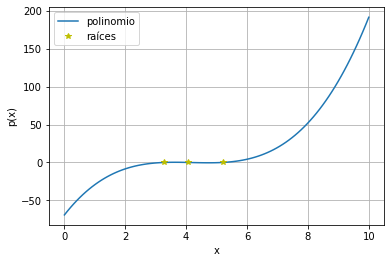

In [24]:
x = np.linspace(0,10,100)
plt.plot(x,p(x), label = 'polinomio')
plt.plot(raices,p(raices),'y*', label = 'raíces')
plt.ylabel('p(x)')
plt.xlabel('x')
plt.grid(True)
plt.legend()

plt.show()